##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [4]:
import cv2

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19396\778398551.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))


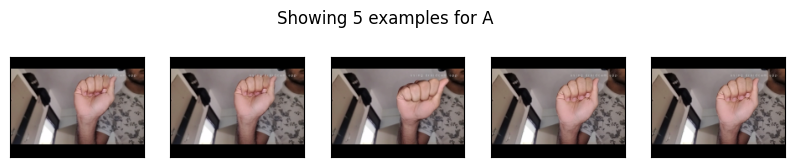

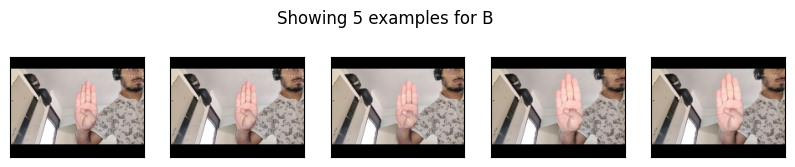

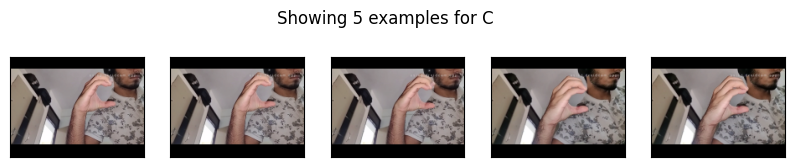

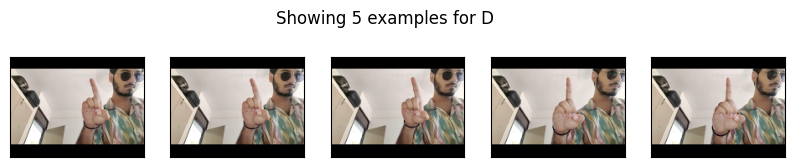

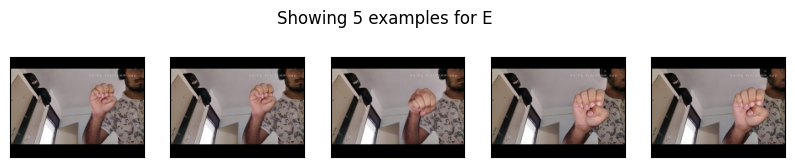

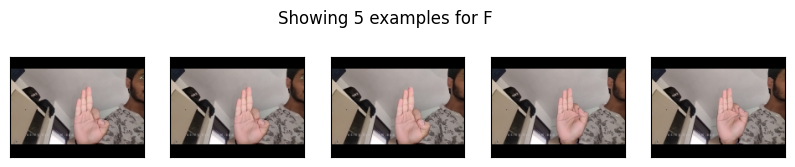

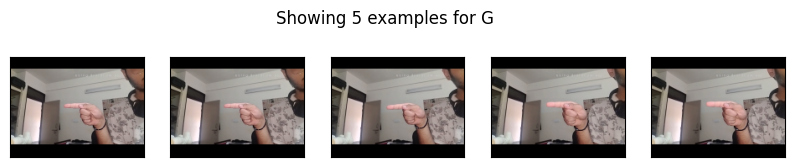

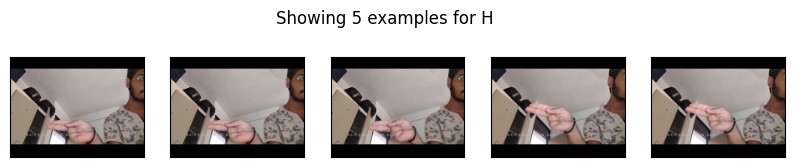

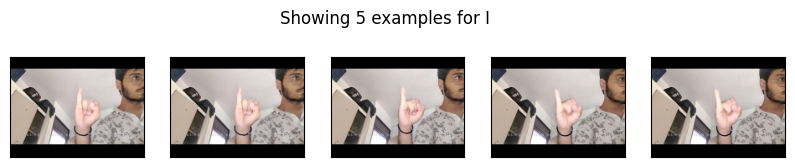

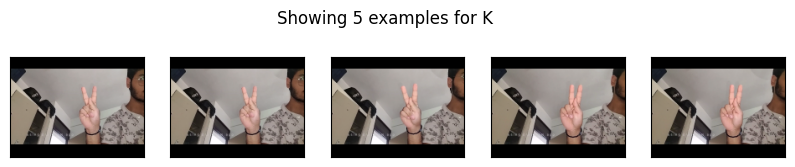

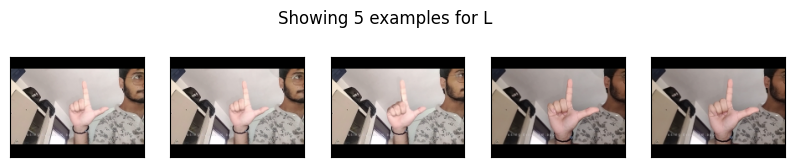

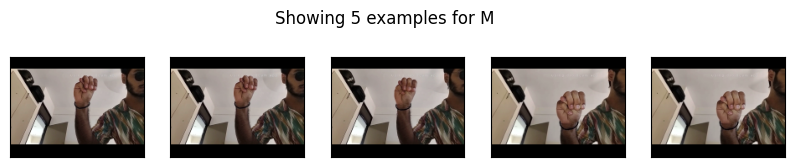

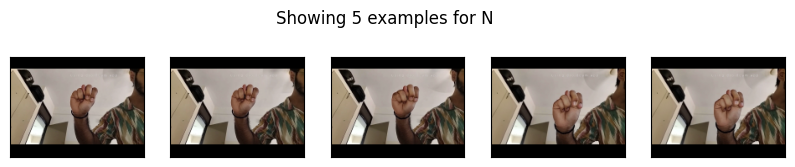

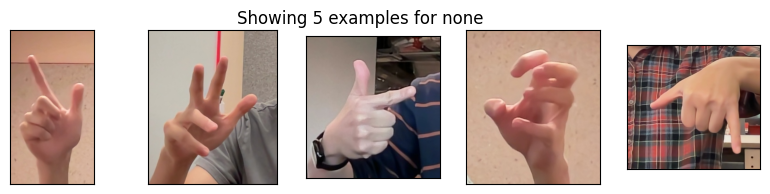

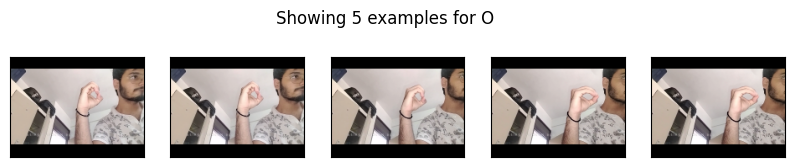

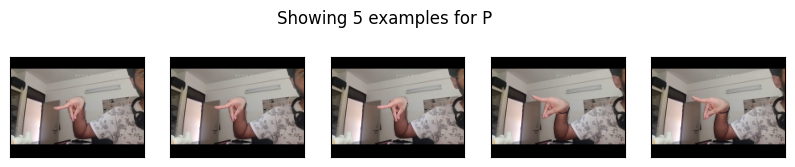

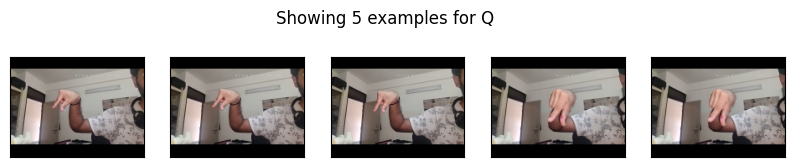

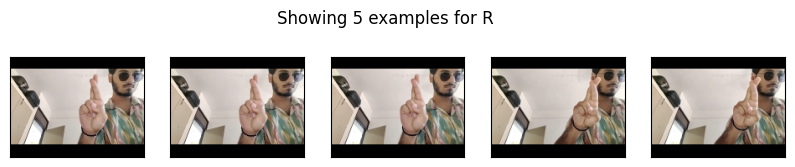

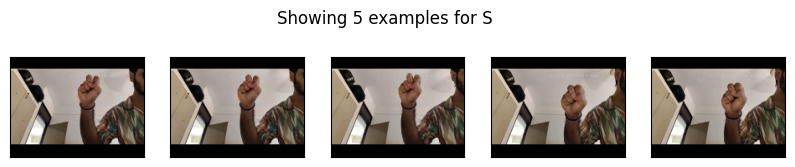

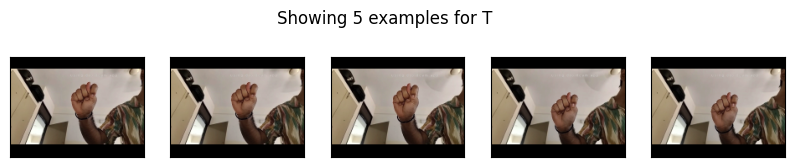

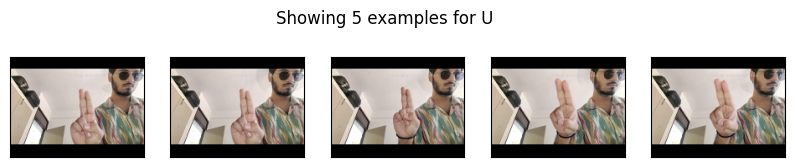

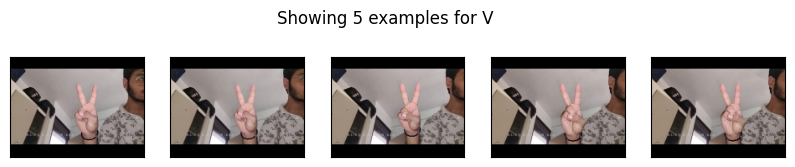

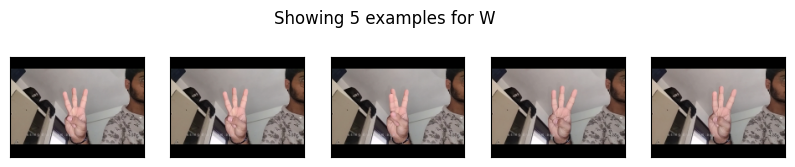

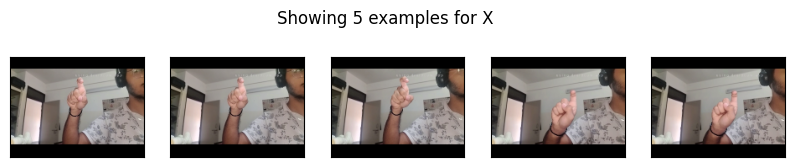

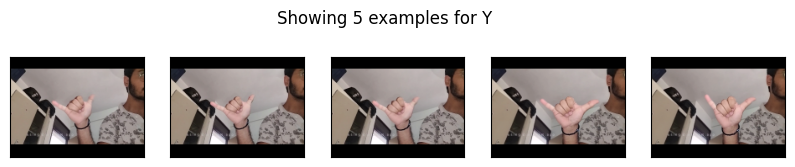

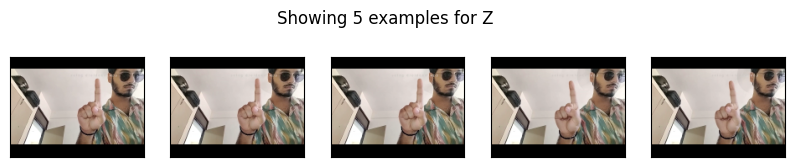

In [5]:
import matplotlib.pyplot as plt
import os

NUM_EXAMPLES = 5
IMAGES_PATH = "dataset"

# Get the list of labels from the list of folder names.
labels = []
for i in os.listdir(IMAGES_PATH):
  if os.path.isdir(os.path.join(IMAGES_PATH, i)):
    labels.append(i)

# Show the images.
for label in labels:
  label_dir = os.path.join(IMAGES_PATH, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

## Making a New Model



In [ ]:
# Import the necessary modules.
from mediapipe_model_maker import gesture_recognizer

In [ ]:
# Load the rock-paper-scissor image archive.
data = gesture_recognizer.Dataset.from_folder(
    dirname=IMAGES_PATH,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)

# Split the archive into training, validation and test dataset.
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

In [ ]:
# Train the model
hparams = gesture_recognizer.HParams(export_dir="gesture_recognizer")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

In [ ]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

In [ ]:
# Export the model bundle.
model.export_model()

# Rename the file to be more descriptive.
!mv rock_paper_scissors_model/gesture_recognizer.task gesture_recognizer.task

In [ ]:
from google.colab import files
files.download("gesture_recognizer.task")